[View in Colaboratory](https://colab.research.google.com/github/tomizo103/mnistbysvm/blob/master/mnistbysvm.ipynb)

# 0.利用する環境
[Google Colabolatory](https://colab.research.google.com/)というサービスを利用します。Googleのアカウントを持っていればなんと無料で使えます！しちめんどくさい環境構築を自分のPCにしなくても、ChromeさえあればOK！

# 1.MNISTデータの取得
sklearnを利用して[http://mldata.org](http://mldata.org)から取得します。

In [0]:
import numpy as np 
from sklearn import datasets
mnist = datasets.fetch_mldata('MNIST original') #  この命令だけでデータダウンロードされます

# 2.データの確認
データの中身を確認してみましょう。<br>
MNISTデータは画像データ、ラベルデータ(画像に描かれた数字が何か)の組み合わせが、学習用に60000個、検証用に10000個含まれています。

In [4]:
imagedata, labeldata = mnist.data,mnist.target
print("画像データ数:"+str(imagedata.shape))
print("ラベルデータ数:"+str(labeldata.shape))

画像データ数:(70000, 784)
ラベルデータ数:(70000,)


画像データ、ラベルデータとも合計70,000データあることが分かりました。画像データの２つ目の項目が784とあるのは、各画像には28*28=784pixel分の輝度データがあるということです。下記で画像データを画像化してみます。

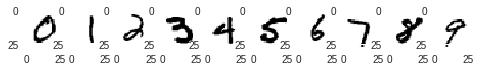

In [5]:
import matplotlib.pyplot as plt
for i in range(1,11): 
    plt.subplot(1,10,i) # 横並びに表示するためのおまじない
    plt.imshow(imagedata[(i-1)*6500].reshape(28,28),cmap='gray_r')
      # データ内から適当な間隔(6500)で拾って、gray_rで白黒反転して表示してます
plt.show() 

ところで、含まれているデータは各数字ぴったり同じではないんですね。ラベルデータ内の度数を見てみると各数字の個数にはばらつきがあります。5のデータが一番少なくて、１が一番多いんですね...約1500枚もの開きがあります。

In [6]:
whatsinlabel = set(labeldata)
print("ラベルデータに含まれる情報の種類: "+ str(whatsinlabel))
howmanylabels = { key: list(labeldata).count(key) for key in whatsinlabel} # 辞書として度数分布表を作る
print("ラベルデータに含まれる情報の頻度: "+ str(howmanylabels))

ラベルデータに含まれる情報の種類: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}
ラベルデータに含まれる情報の頻度: {0.0: 6903, 1.0: 7877, 2.0: 6990, 3.0: 7141, 4.0: 6824, 5.0: 6313, 6.0: 6876, 7.0: 7293, 8.0: 6825, 9.0: 6958}


# 3.訓練データと検証データに分割
4/5を訓練データ、1/5を検証データとしてみます。データは頭から0のデータが6903個、1のデータが7877個...と並んでいますので、ランダムにシャッフルして利用します。sklearnの便利な関数でデータ分割が１行で済んじゃいます。

In [7]:
from sklearn.model_selection import train_test_split
imagedata_training,imagedata_validation,labeldata_training,labeldata_validation = train_test_split(imagedata,labeldata,test_size=0.2)
print("訓練画像データ数:"+str(imagedata_training.shape))
print("検証画像データ数:"+str(imagedata_validation.shape))
print("訓練ラベルデータ数:"+str(labeldata_training.shape))
print("検証ラベルデータ数:"+str(labeldata_validation.shape))

訓練画像データ数:(56000, 784)
検証画像データ数:(14000, 784)
訓練ラベルデータ数:(56000,)
検証ラベルデータ数:(14000,)


頭から拾って見てみましょう

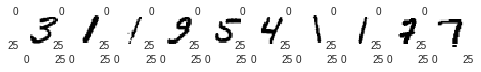

In [8]:
for i in range(1,11): 
    plt.subplot(1,10,i) # 横並びに表示するためのおまじない
    plt.imshow(imagedata_training[i-1].reshape(28,28),cmap='gray_r')
plt.show() 

お、シャッフルされてますね。

# 4.学習と評価

## 準備

In [0]:
# 256階調の輝度値を0-1の値に変換しておきます
imagedata_training = imagedata_training/255.
imagedata_validation = imagedata_validation/255.

## 学習

In [84]:
import os
from sklearn.svm import SVC
import time

# 学習
start = time.time()

clf = SVC()
clf.fit(imagedata_training, labeldata_training)

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:948.7113966941833[sec]


CPUモードで948[sec]、GPUモードで661[sec]でした！


## 評価

In [85]:
# 評価
start = time.time()

predict = clf.predict(imagedata_validation)

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

# 結果表示
print("結果")
ac_score = metrics.accuracy_score(labeldata_validation, predict)
cl_report = metrics.classification_report(labeldata_validation, predict)
print("正解率 = ", ac_score)
print(cl_report)

elapsed_time:359.38180708885193[sec]
結果
正解率 =  0.9377142857142857
             precision    recall  f1-score   support

        0.0       0.97      0.98      0.97      1340
        1.0       0.95      0.98      0.97      1620
        2.0       0.93      0.93      0.93      1372
        3.0       0.94      0.90      0.92      1453
        4.0       0.92      0.95      0.93      1361
        5.0       0.91      0.91      0.91      1261
        6.0       0.96      0.97      0.96      1361
        7.0       0.95      0.94      0.94      1461
        8.0       0.93      0.90      0.92      1369
        9.0       0.92      0.92      0.92      1402

avg / total       0.94      0.94      0.94     14000

